### 스크레이핑, 크롤링
- Scraping: 웹 사이트의 특정 정보를 추출하는 것. 웹 데이터의 구조 분석이 필요. 로그인이 필요한 경우가 많다
- Crawling: 프로그램이 웹사이트를 정기적으로 돌며 정보를 추출하는 것 (이러한 프로그램을 크롤러, 스파이더라고 한다)

#### urllib 사용법
- url 관련 데이터를 처리하는 Python 라이브러리 
- http 또는 ftp를 사용해 데이터를 다운로드 받는데 사용

#### 웹에서 파일 다운로드하기

In [1]:
# 네이버 실시간 검색어
import re
import requests

re.findall('<span class="ah_k">(.*?)</span>', requests.get('http://naver.com').text)[:20]

[]

In [2]:
# json으로 보기
import json, requests
from pandas.io.json import json_normalize

r = requests.get('http://rank.search.naver.com/rank.js')
json_normalize(json.loads(r.text), ['data','data'])

<ipython-input-2-0f2c55a99c7a>:6: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  json_normalize(json.loads(r.text), ['data','data'])


,rank,keyword,change,score,tvalue,cvalue,ratio,delta
0,1,-,+,0,0,0,.,0
1,2,-,+,0,0,0,.,0
2,3,-,+,0,0,0,.,0
3,4,-,+,0,0,0,.,0
4,5,-,+,0,0,0,.,0
5,6,-,+,0,0,0,.,0
6,7,-,+,0,0,0,.,0
7,8,-,+,0,0,0,.,0
8,9,-,+,0,0,0,.,0
9,10,-,+,0,0,0,.,0


In [3]:
import urllib.request
url = "http://uta.pw/shodou/img/28/214.png"
savename = "data/test.png"
urllib.request.urlretrieve(url, savename)

('data/test.png', <http.client.HTTPMessage at 0x19269e8bf70>)

#### urlopen() 사용법
- 위의 urlretrive()는 데이터를 파일에 바로 저장하였다.
- urlopen()을 사용하면 데이터를 파이선에서 읽을 수 있다.

In [4]:
mem = urllib.request.urlopen(url).read()
with open(savename, "wb") as f:
    f.write(mem)

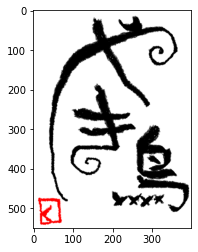

In [11]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
plt.imshow(mpimg.imread(savename))

#### 웹 API 이용하기
- 클라이언트정보를 보여주는 샘플 api 사이트 접속

In [12]:
url = "http://api.aoikujira.com/ip/ini"
res = urllib.request.urlopen(url)
data = res.read() # 바이너리 데이터를 문자열로 변환
text = data.decode("utf-8")
print(text)
print(data)

[ip]
API_URI=http://api.aoikujira.com/ip/get.php
REMOTE_ADDR=210.93.61.55
REMOTE_HOST=210.93.61.55
REMOTE_PORT=37230
HTTP_HOST=api.aoikujira.com
HTTP_USER_AGENT=Python-urllib/3.8
HTTP_ACCEPT_LANGUAGE=
HTTP_ACCEPT_CHARSET=
SERVER_PORT=80
FORMAT=ini


b'[ip]\nAPI_URI=http://api.aoikujira.com/ip/get.php\nREMOTE_ADDR=210.93.61.55\nREMOTE_HOST=210.93.61.55\nREMOTE_PORT=37230\nHTTP_HOST=api.aoikujira.com\nHTTP_USER_AGENT=Python-urllib/3.8\nHTTP_ACCEPT_LANGUAGE=\nHTTP_ACCEPT_CHARSET=\nSERVER_PORT=80\nFORMAT=ini\n\n'


In [21]:
# 파라미터를 전송하여 데이터를 읽는 예
import urllib.parse
API = "http://www.kma.go.kr/weather/forecast/mid-term-rss3.jsp"


# 파라미터 코딩, 딕셔너리 사용, 109: 서울 경기지역
values = {
    'stdId': '109'
}

params = urllib.parse.urlencode(values)
url = API + "?" + params
print ("url=", url)
data = urllib.request.urlopen(url).read() # 바이너리 데이터를 문자열로 변환
text = data.decode("utf-8")
print(text)


url= http://www.kma.go.kr/weather/forecast/mid-term-rss3.jsp?stdId=109
<?xml version="1.0" encoding="utf-8" ?>
<rss version="2.0">
<channel>
<title>기상청 육상 중기예보</title>
<link>http://www.kma.go.kr/weather/forecast/mid-term_01.jsp</link>
<description>기상청 날씨 웹서비스</description>
<language>ko</language>
<generator>기상청</generator>
<pubDate>2021년 01월 06일 (수)요일 18:00</pubDate>
 <item>
<author>기상청</author>
<category>육상중기예보</category>
<title>전국 육상 중기예보 - 2021년 01월 06일 (수)요일 18:00 발표</title>
<link>http://www.kma.go.kr/weather/forecast/mid-term_01.jsp</link>
<guid>http://www.kma.go.kr/weather/forecast/mid-term_01.jsp</guid>
<description>
	<header>
		<title>전국 육상중기예보</title>
		<tm>202101061800</tm>
		<wf><![CDATA[○ (강수) 전라권은 9일(토)~11일(월)에 눈이 오겠고, 제주도는 9일(토)~10일(일)에 눈, 11일(월)~12일(화)에 비 또는 눈이 오겠습니다.<br />○ (기온) 9일(토)~12일(화) 아침 기온은 -22~-2도, 낮 기온은 -6~6도로 오늘(아침 기온 -16~6도, 낮 기온 -3~2도)보다 낮겠습니다.<br />          특히, 강원영서는 -20도 이하, 중부내륙과 경북내륙은 -15도 이하(남부내륙 -10도 이하)로 떨어지는 곳이 많아 매우 춥겠습니다.<br />          이번 추위는 9일

####  GET  요청을 사용하여 파라미터를 보내는 경우
- URL 끝 부분에 ?를 입력하고 key = value 형식으로 매개변수를 추가한다. 여러개의 파라미터를 넣는 경우 &를 사용하여 구분한다
- 한글 등이 파라미터로 사용될 때는 반드시 이러한 코딩을 해주어야 한다

#### 키보드에서 파라미터를 입력받는 방법

In [20]:
import sys
import urllib.parse as parse
import urllib.request as req

# 명령어를 사용하는 경우 사용법 python3 forecast.py 108
# if len(sys.argv) <= 1:
#     print("python3 forecast.py 지역번호")
#     sys.exit()  
# regionNumber = sys.argv[1]

regionNumber = input()

API = "http://www.kma.go.kr/weather/forecast/mid-term-rss3.jsp"

values = {
    'stdId': regionNumber
}

params = parse.urlencode(values)
url = API + "?" + params
print ("url=", url)
data = req.urlopen(url).read() # 바이너리 데이터를 문자열로 변환
text = data.decode("utf-8")
print(text)


111
url= http://www.kma.go.kr/weather/forecast/mid-term-rss3.jsp?stdId=111
<?xml version="1.0" encoding="utf-8" ?>
<rss version="2.0">
<channel>
<title>기상청 육상 중기예보</title>
<link>http://www.kma.go.kr/weather/forecast/mid-term_01.jsp</link>
<description>기상청 날씨 웹서비스</description>
<language>ko</language>
<generator>기상청</generator>
<pubDate>2021년 01월 06일 (수)요일 18:00</pubDate>
 <item>
<author>기상청</author>
<category>육상중기예보</category>
<title>전국 육상 중기예보 - 2021년 01월 06일 (수)요일 18:00 발표</title>
<link>http://www.kma.go.kr/weather/forecast/mid-term_01.jsp</link>
<guid>http://www.kma.go.kr/weather/forecast/mid-term_01.jsp</guid>
<description>
	<header>
		<title>전국 육상중기예보</title>
		<tm>202101061800</tm>
		<wf><![CDATA[○ (강수) 전라권은 9일(토)~11일(월)에 눈이 오겠고, 제주도는 9일(토)~10일(일)에 눈, 11일(월)~12일(화)에 비 또는 눈이 오겠습니다.<br />○ (기온) 9일(토)~12일(화) 아침 기온은 -22~-2도, 낮 기온은 -6~6도로 오늘(아침 기온 -16~6도, 낮 기온 -3~2도)보다 낮겠습니다.<br />          특히, 강원영서는 -20도 이하, 중부내륙과 경북내륙은 -15도 이하(남부내륙 -10도 이하)로 떨어지는 곳이 많아 매우 춥겠습니다.<br />          이번 추위